In [1]:
import os
import random
import geopandas as gpd
from django.contrib.gis.geos import GEOSGeometry

os.environ["DJANGO_ALLOW_ASYNC_UNSAFE"] = "true"

In [2]:
geopackage = "/Users/matheuszanela/Desktop/urbangeosig/cassilandia.gpkg"

In [3]:
setor_gdf = gpd.read_file(geopackage, layer="setores")

In [4]:
setor_gdf

,id,setor,cod_ibge_m,geometry
0,1,1,5002902,"MULTIPOLYGON (((-51.74957 -19.10918, -51.74967..."
1,2,7,5002902,"MULTIPOLYGON (((-51.74004 -19.11957, -51.73978..."
2,3,8,5002902,"MULTIPOLYGON (((-51.73226 -19.11979, -51.72684..."
3,4,5,5002902,"MULTIPOLYGON (((-51.74244 -19.11391, -51.73634..."
4,5,3,5002902,"MULTIPOLYGON (((-51.74542 -19.10709, -51.73634..."
5,6,2,5002902,"MULTIPOLYGON (((-51.73073 -19.10373, -51.73073..."
6,7,6,5002902,"MULTIPOLYGON (((-51.72599 -19.11979, -51.72672..."
7,8,4,5002902,"MULTIPOLYGON (((-51.72697 -19.11033, -51.72698..."
8,9,0,5002902,"MULTIPOLYGON (((-51.72324 -19.11405, -51.72304..."


<Axes: >

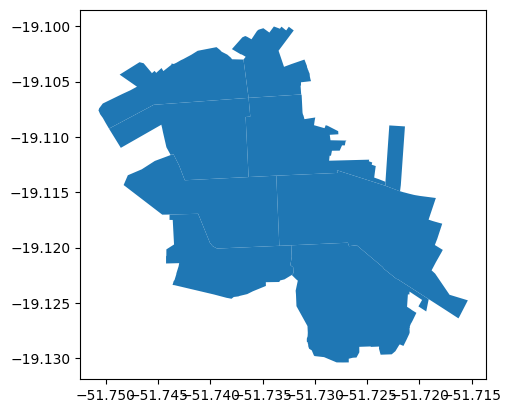

In [5]:
setor_gdf.plot()

In [6]:
quadra_gdf = gpd.read_file(geopackage, layer="quadras")

In [7]:
quadra_gdf

,id,quadra,cod_ibge_m,quadra_setor,geometry
0,1260,60,5002902,Q:60 S:8,"MULTIPOLYGON (((-51.72420 -19.12846, -51.72420..."
1,1258,64,5002902,Q:64 S:8,"MULTIPOLYGON (((-51.72561 -19.12888, -51.72572..."
2,1257,92,5002902,Q:92 S:8,"MULTIPOLYGON (((-51.72585 -19.12816, -51.72584..."
3,1255,93,5002902,Q:93 S:8,"MULTIPOLYGON (((-51.72640 -19.12882, -51.72639..."
4,1254,94,5002902,Q:94 S:8,"MULTIPOLYGON (((-51.72712 -19.12895, -51.72734..."
...,...,...,...,...,...
546,1442,5,5002902,Q:5 S:5,"MULTIPOLYGON (((-51.73474 -19.11873, -51.73487..."
547,1348,56,5002902,Q:56 S:7,"MULTIPOLYGON (((-51.73736 -19.12356, -51.73746..."
548,1502,9,5002902,Q:9 S:5,"MULTIPOLYGON (((-51.73598 -19.11669, -51.73610..."
549,1312,27,5002902,Q:27 S:8,"MULTIPOLYGON (((-51.72882 -19.12392, -51.72882..."


<Axes: >

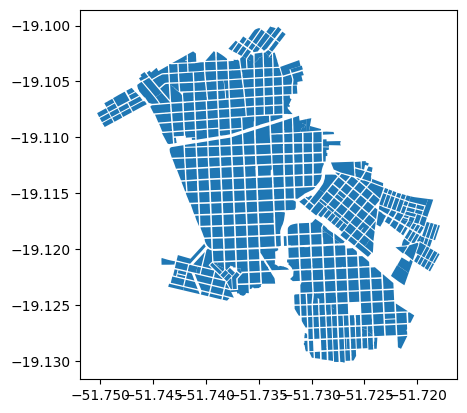

In [8]:
quadra_gdf.plot()

In [9]:
lote_gdf = gpd.read_file(geopackage, layer="lotes")

In [10]:
lote_gdf

,id,lote,cod_ibge_m,area_m2,total_area_construida,geometry
0,10245,10144724,5002902,194.96,62.90,"MULTIPOLYGON (((-51.73376 -19.10209, -51.73382..."
1,10252,10144725,5002902,199.41,130.88,"MULTIPOLYGON (((-51.73370 -19.10202, -51.73376..."
2,10258,10144726,5002902,199.84,71.09,"MULTIPOLYGON (((-51.73364 -19.10195, -51.73370..."
3,10246,10144727,5002902,190.04,116.56,"MULTIPOLYGON (((-51.73359 -19.10187, -51.73364..."
4,10256,10144728,5002902,198.13,52.89,"MULTIPOLYGON (((-51.73353 -19.10180, -51.73359..."
...,...,...,...,...,...,...
9630,14909,NaN,5002902,215.23,0.00,"MULTIPOLYGON (((-51.72512 -19.12529, -51.72513..."
9631,15619,NaN,5002902,2121.37,0.00,"MULTIPOLYGON (((-51.73156 -19.12025, -51.73155..."
9632,17408,NaN,5002902,929.11,0.00,"MULTIPOLYGON (((-51.73226 -19.10769, -51.73201..."
9633,19771,NaN,5002902,333.85,0.00,"MULTIPOLYGON (((-51.71931 -19.11785, -51.71931..."


In [11]:
lote_gdf = lote_gdf.fillna("Não informado!")

<Axes: >

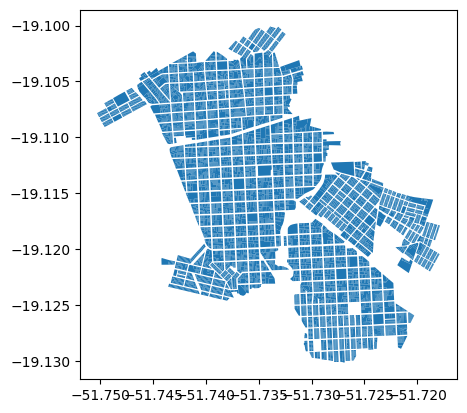

In [12]:
lote_gdf.plot()

In [13]:
data = []
for idx, row in setor_gdf.iterrows():
    setor = Setor()
    setor.num_setor = row["setor"]
    setor.geom = GEOSGeometry(f"{row['geometry']}")
    data.append(setor)

In [14]:
Setor.objects.bulk_create(data)

[<Setor: 1>,
 <Setor: 7>,
 <Setor: 8>,
 <Setor: 5>,
 <Setor: 3>,
 <Setor: 2>,
 <Setor: 6>,
 <Setor: 4>,
 <Setor: 0>]

In [15]:
Setor.objects.count()

9

In [16]:
data = []
for idx, row in quadra_gdf.iterrows():
    quadra = Quadra()
    quadra.num_quadra = row["quadra"]
    quadra.geom = GEOSGeometry(f"{row['geometry']}")
    setor = Setor.objects.filter(geom__contains=quadra.geom.point_on_surface).first()
    quadra.setor = setor
    data.append(quadra)

In [17]:
Quadra.objects.bulk_create(data)

[<Quadra: 60>,
 <Quadra: 64>,
 <Quadra: 92>,
 <Quadra: 93>,
 <Quadra: 94>,
 <Quadra: 93>,
 <Quadra: 95>,
 <Quadra: 96>,
 <Quadra: 97>,
 <Quadra: 98>,
 <Quadra: 99>,
 <Quadra: 124>,
 <Quadra: 128>,
 <Quadra: 56>,
 <Quadra: 45>,
 <Quadra: 51>,
 <Quadra: 55>,
 <Quadra: 61>,
 <Quadra: 63>,
 <Quadra: 65>,
 <Quadra: 67>,
 <Quadra: 69>,
 <Quadra: 90>,
 <Quadra: 91>,
 <Quadra: 119>,
 <Quadra: 38>,
 <Quadra: 34>,
 <Quadra: 36>,
 <Quadra: 50>,
 <Quadra: 50>,
 <Quadra: 43>,
 <Quadra: 57>,
 <Quadra: 54>,
 <Quadra: 66>,
 <Quadra: 68>,
 <Quadra: 71>,
 <Quadra: 73>,
 <Quadra: 88>,
 <Quadra: 89>,
 <Quadra: 113>,
 <Quadra: 115>,
 <Quadra: 109>,
 <Quadra: 110>,
 <Quadra: 34>,
 <Quadra: 40>,
 <Quadra: 42>,
 <Quadra: 49>,
 <Quadra: 31>,
 <Quadra: 70>,
 <Quadra: 72>,
 <Quadra: 106>,
 <Quadra: 108>,
 <Quadra: 36>,
 <Quadra: 38>,
 <Quadra: 41>,
 <Quadra: 41>,
 <Quadra: 42>,
 <Quadra: 48>,
 <Quadra: 1>,
 <Quadra: 29>,
 <Quadra: 30>,
 <Quadra: 31>,
 <Quadra: 40>,
 <Quadra: 23>,
 <Quadra: 25>,
 <Quadra: 26>,
 <

In [18]:
Quadra.objects.count()

551

In [19]:
SITUACAO_CHOICES = (
    ("a-ser-atendido", "A ser atendido"),
    ("lote-cadastrado", "Lote cadastrado"),
    ("lote-titulado", "Lote titulado"),
)

In [20]:
data = []
for idx, row in lote_gdf.iterrows():
    lote = Lote()
    lote.num_lote = row["lote"]
    lote.geom = GEOSGeometry(f"{row['geometry']}")
    lote.situacao = random.choice(SITUACAO_CHOICES)[0]
    quadra = Quadra.objects.filter(geom__contains=lote.geom.point_on_surface).first()
    lote.quadra = quadra
    data.append(lote)

In [21]:
Lote.objects.bulk_create(data)

[<Lote: 10144724>,
 <Lote: 10144725>,
 <Lote: 10144726>,
 <Lote: 10144727>,
 <Lote: 10144728>,
 <Lote: 10144729>,
 <Lote: 10144730>,
 <Lote: 10144731>,
 <Lote: 10144732>,
 <Lote: 10144733>,
 <Lote: 10144734>,
 <Lote: 10144735>,
 <Lote: 10144737>,
 <Lote: 10144738>,
 <Lote: 10144739>,
 <Lote: 10144740>,
 <Lote: 10144741>,
 <Lote: 10144742>,
 <Lote: 10144743>,
 <Lote: 10144744>,
 <Lote: 10144756>,
 <Lote: 10144758>,
 <Lote: 10144759>,
 <Lote: 10144760>,
 <Lote: 10144761>,
 <Lote: 10144763>,
 <Lote: 10144764>,
 <Lote: 10144765>,
 <Lote: 10144766>,
 <Lote: 10144767>,
 <Lote: 10144768>,
 <Lote: 10144769>,
 <Lote: 10144771>,
 <Lote: 10144772>,
 <Lote: 10144773>,
 <Lote: 10144774>,
 <Lote: 10144775>,
 <Lote: 10144776>,
 <Lote: 10150360>,
 <Lote: Não informado!>,
 <Lote: 10144709>,
 <Lote: Não informado!>,
 <Lote: 10144710>,
 <Lote: 10144711>,
 <Lote: 10144712>,
 <Lote: 10144713>,
 <Lote: 10144714>,
 <Lote: 10144715>,
 <Lote: 10144716>,
 <Lote: 10144717>,
 <Lote: 10144718>,
 <Lote: 10144719>,
